# Assignment 1

## Part 1: Visualizing patterns in the data

In [3]:
import pandas as pd

data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240130.csv")

focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

### Plot that captures the development of focus crimes across weekdays:

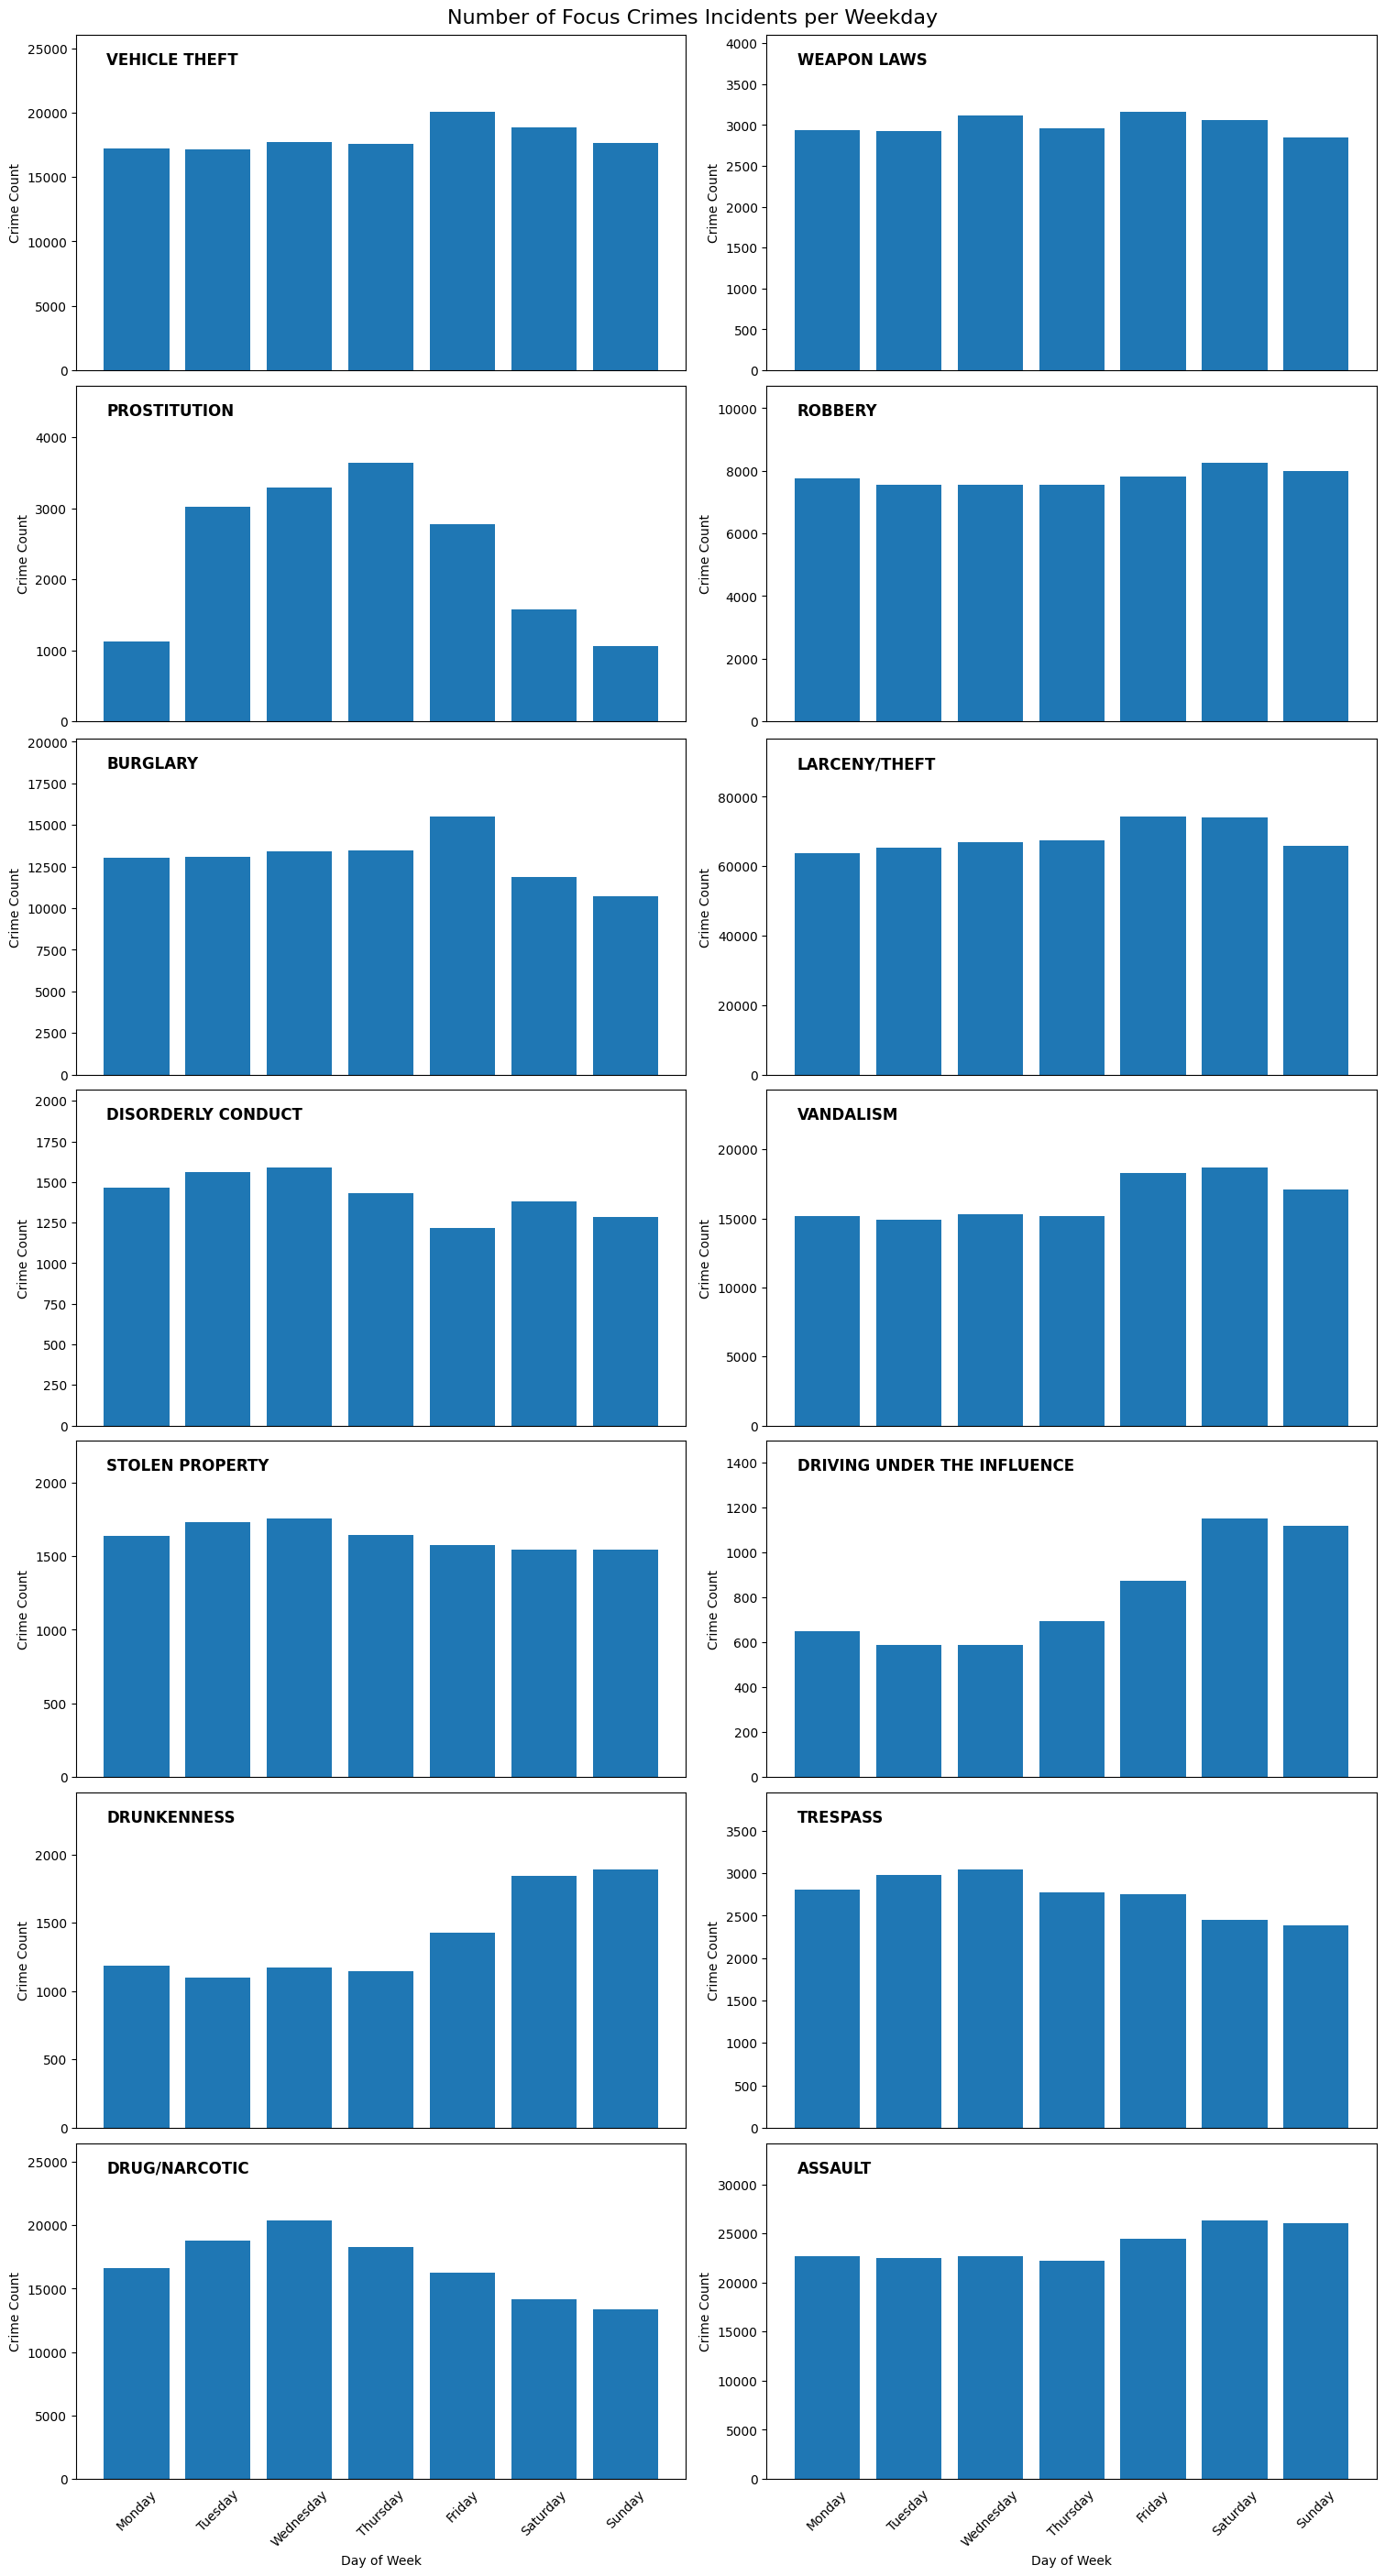

In [4]:
import matplotlib.pyplot as plt

crime_occurrences = data[data['Category'].isin(focuscrimes)].groupby(["Category", "DayOfWeek"]).size().reset_index(name='Count')

fig, axs = plt.subplots(7, 2, figsize=(15, 28), constrained_layout=True)
axs = axs.flatten()

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, category in enumerate(focuscrimes):
    ax = axs[i]
    cat_data = crime_occurrences[crime_occurrences['Category'] == category].copy()
    cat_data['DayOfWeek'] = pd.Categorical(cat_data['DayOfWeek'], categories=weekdays, ordered=True)
    cat_data = cat_data.sort_values('DayOfWeek')
    ax.bar(cat_data['DayOfWeek'], cat_data['Count'])
    ax.text(0.05, 0.95, category, ha='left', va='top', transform=ax.transAxes, fontsize=12, weight='bold')
    ax.set_ylabel('Crime Count')
    ax.set_ylim(0, cat_data['Count'].max() * 1.3)
    ax.set_xlabel('Day of Week') if i // 2 == 6 else None
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=(i // 2 == 6))
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Number of Focus Crimes Incidents per Weekday', fontsize=16)
plt.show()

#### Comments:

The plots above show the incident numbers of the fourteen crimes by day of the week in San Francisco from the beginning of 1 January 2003 to the end of 14 May 2018. It is noteworthy that the number of documented incidents of prostitution remains high from Tuesday to Friday compared to Monday, Saturday and Sunday. Between Monday and Tuesday there is an almost 3-fold increase in recorded prostitution. Drug-related incidents increase from Monday to Wednesday and decrease from Thursday to the end of the week. In addition, drink driving on Saturday and Sunday is about 2 times higher compared to Monday to Thursday.

### Plot that captures the development of focus crimes across the months:

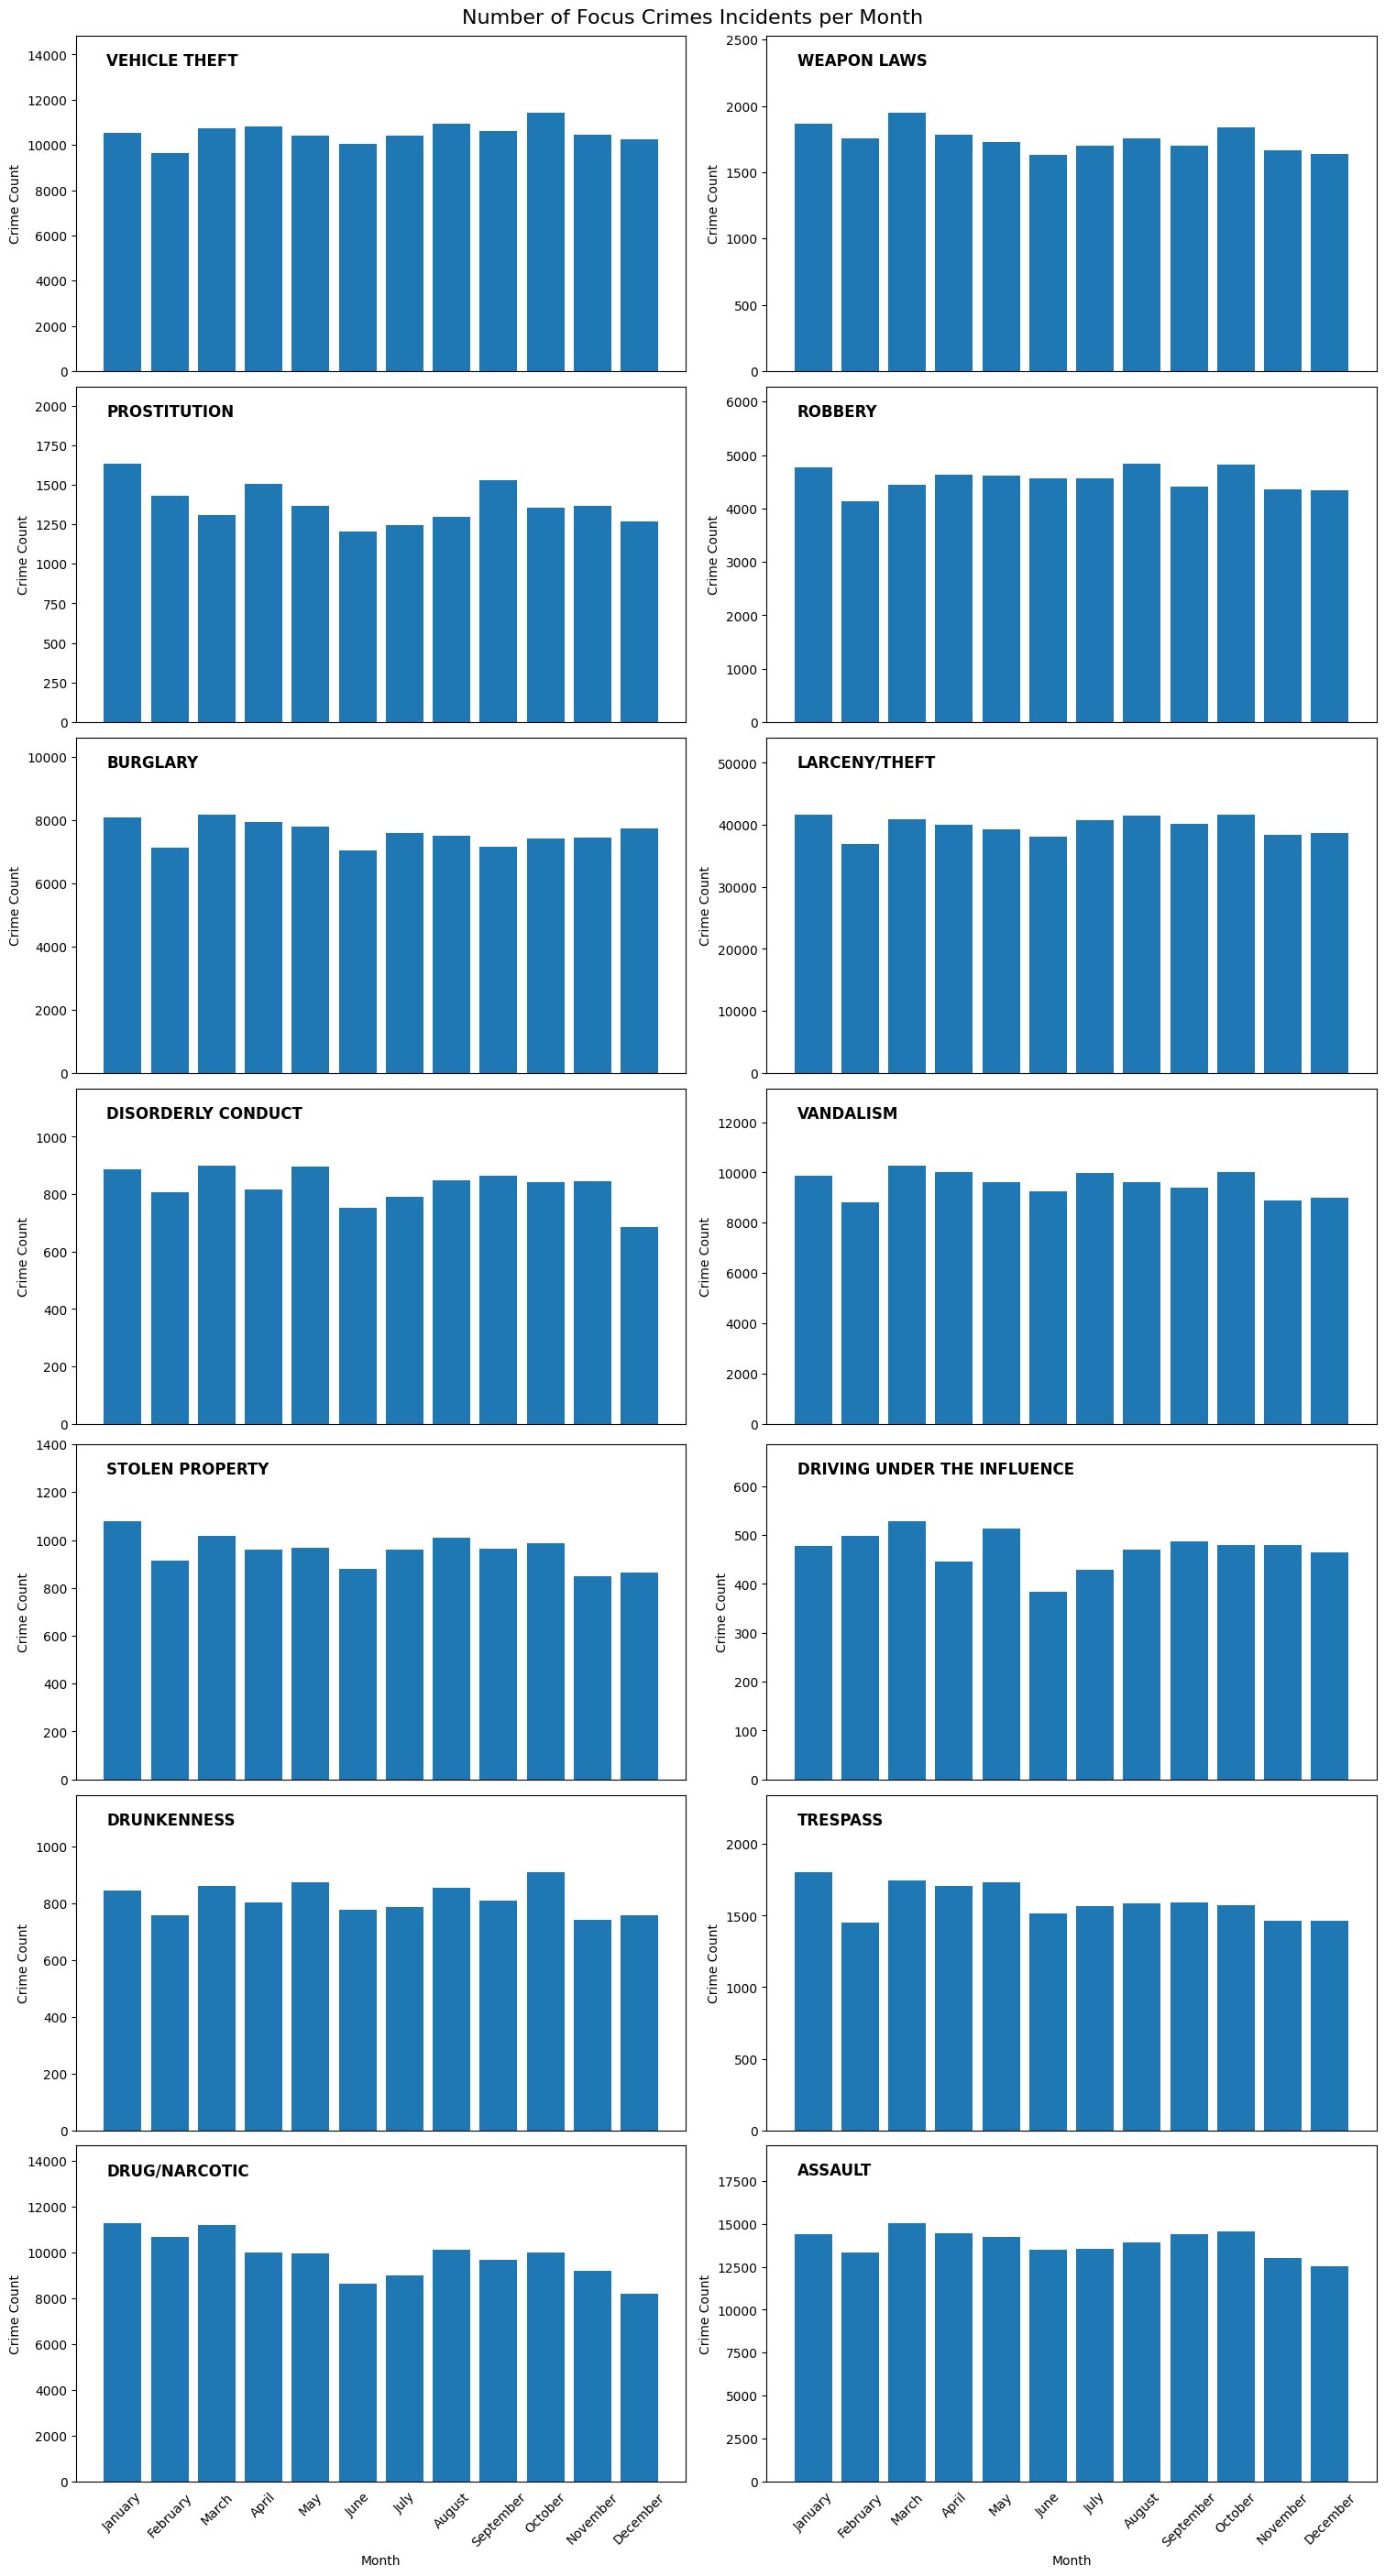

In [5]:
crime_occurrences = (data[data['Category'].isin(focuscrimes)].groupby(['Category', pd.to_datetime(data['Date']).dt.month]).size().reset_index(name='Count'))

fig, axs = plt.subplots(7, 2, figsize=(15, 28), constrained_layout=True)
axs = axs.flatten()

months = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
               7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

for i, category in enumerate(focuscrimes):
    ax = axs[i]
    cat_data = crime_occurrences[crime_occurrences['Category'] == category].copy()
    cat_data['Date'] = cat_data['Date'].map(months)
    ax.bar(cat_data['Date'], cat_data['Count'])
    ax.text(0.05, 0.95, category, ha='left', va='top', transform=ax.transAxes, fontsize=12, weight='bold')
    ax.set_ylabel('Crime Count')
    ax.set_ylim(0, cat_data['Count'].max() * 1.3)
    ax.set_xlabel('Month') if i // 2 == 6 else None
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=(i // 2 == 6))
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Number of Focus Crimes Incidents per Month', fontsize=16)
plt.show()

#### Comments:

The plots above show the incident numbers of the fourteen crimes by month in San Francisco from the beginning of 1 January 2003 to the end of 14 May 2018.

### Plot that captures the development of focus crimes across the 24-hour cycle:

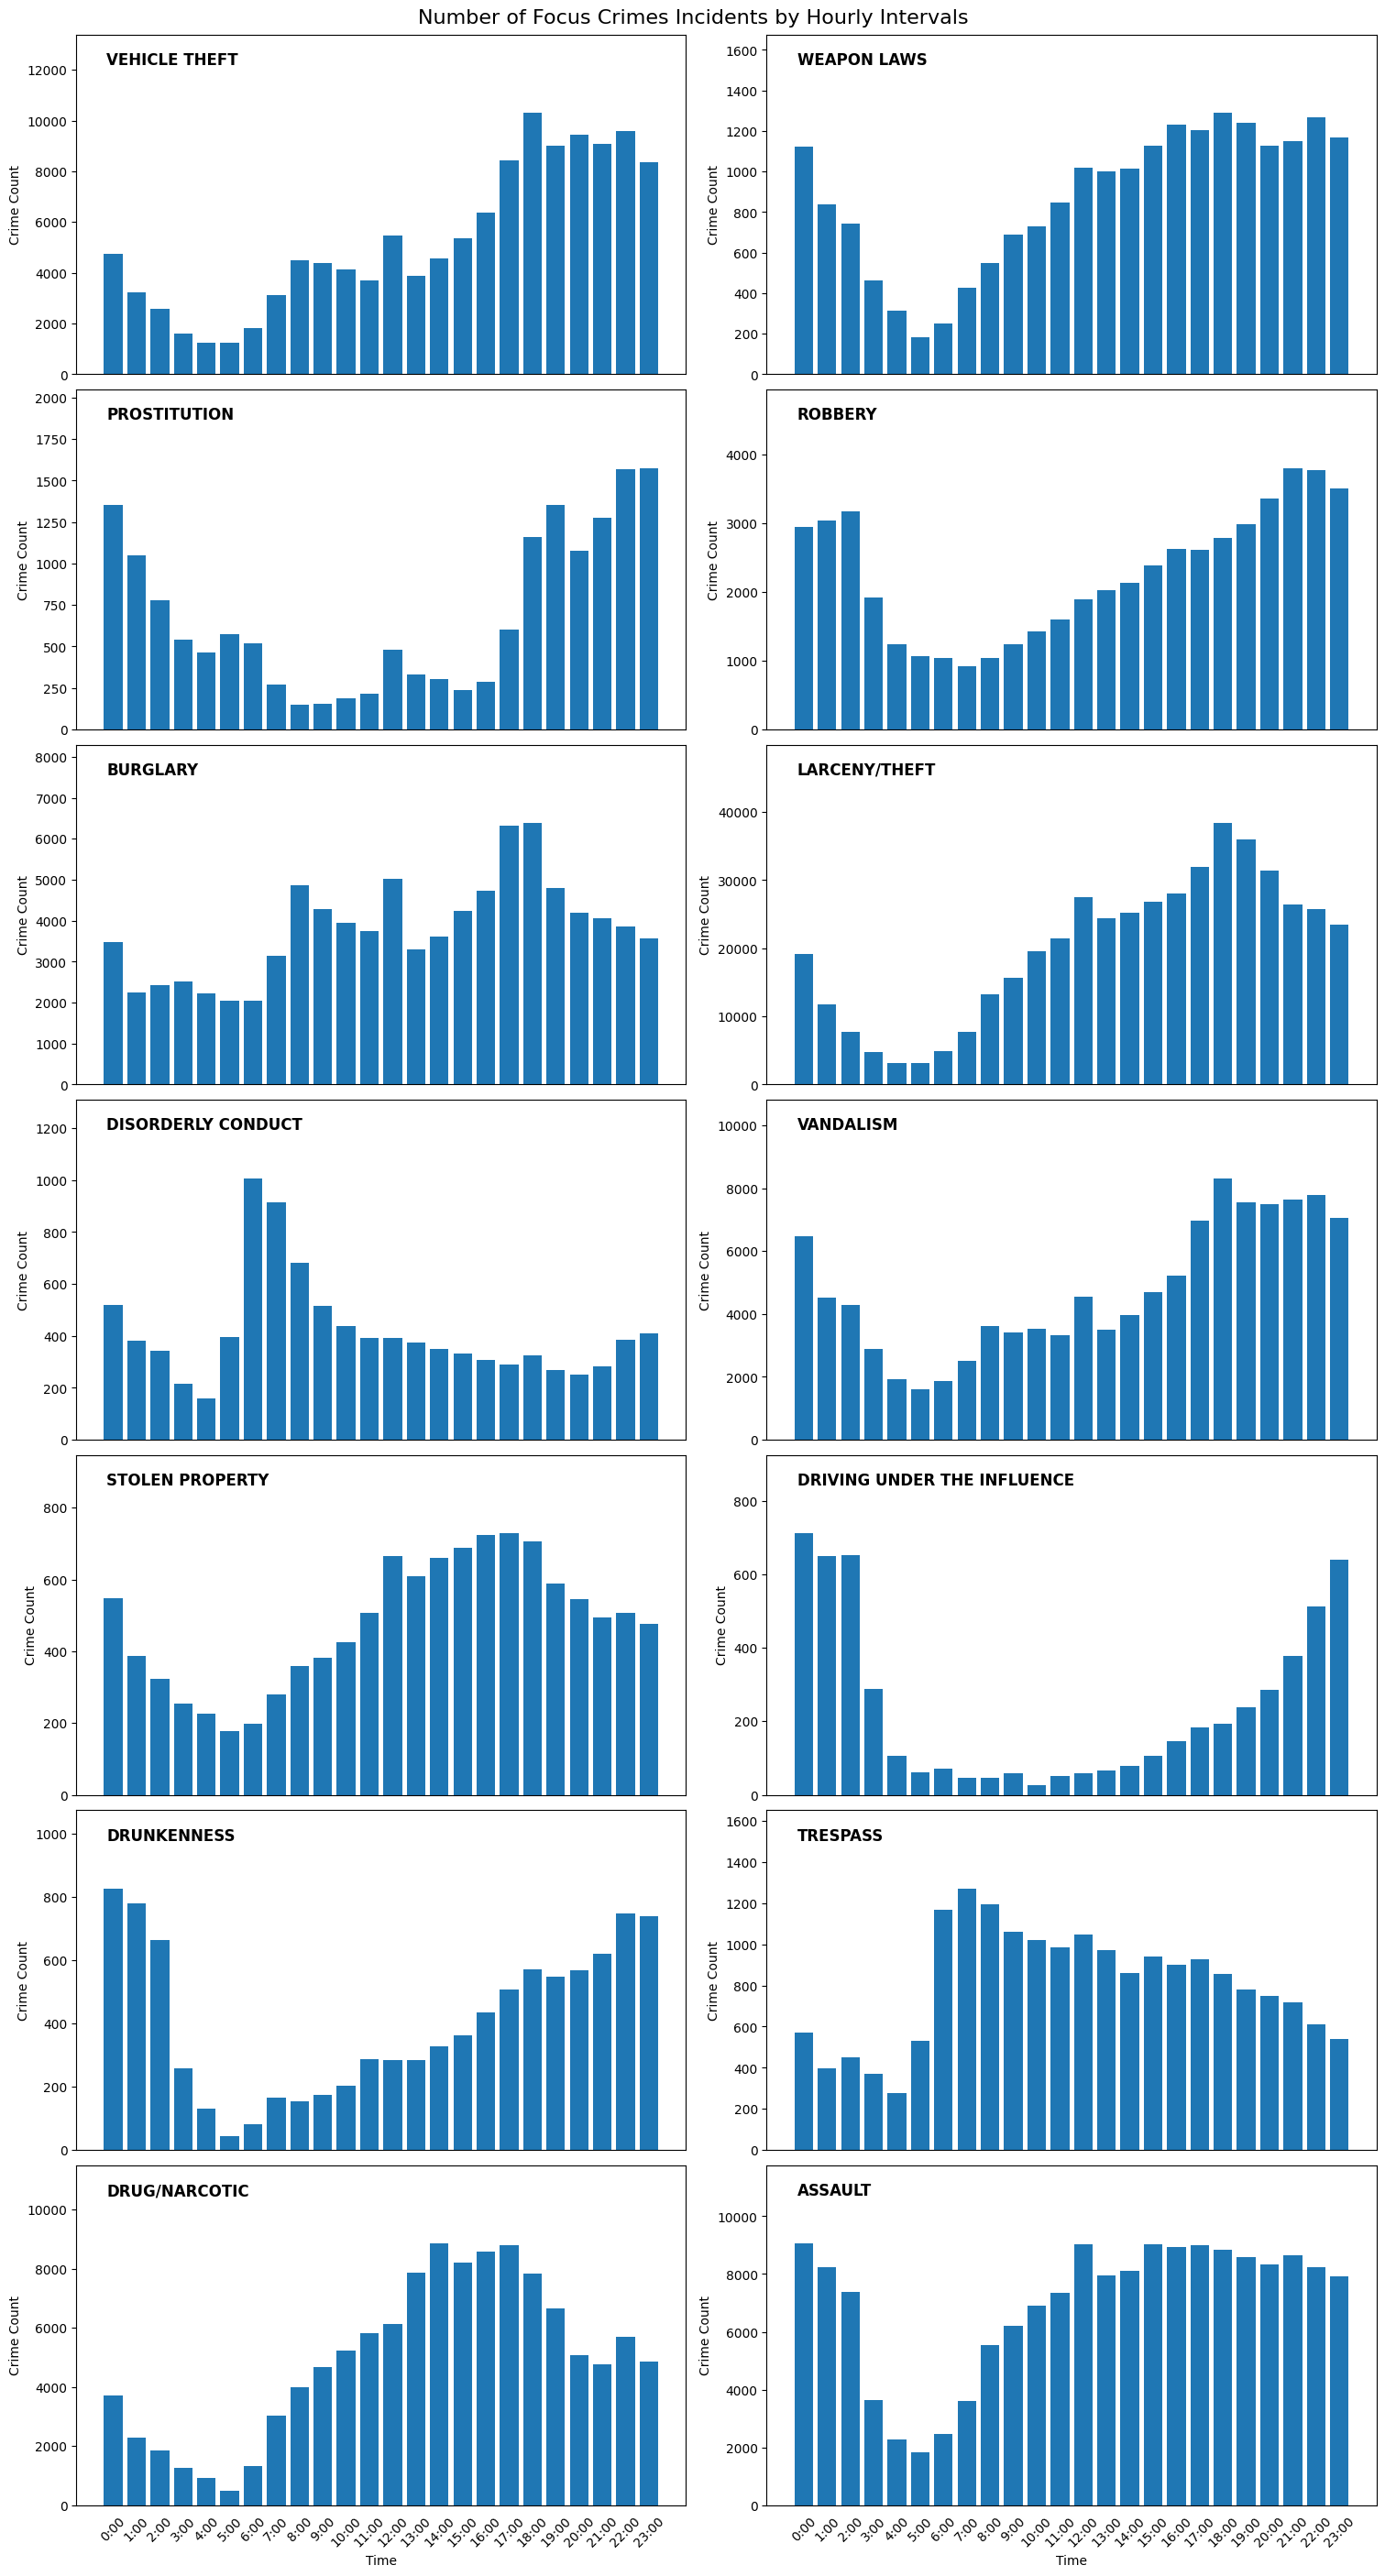

In [6]:
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour
crime_occurrences = (data[data['Category'].isin(focuscrimes)].groupby(['Category', 'Hour']).size().reset_index(name='Count'))

fig, axs = plt.subplots(7, 2, figsize=(15, 28), constrained_layout=True)
axs = axs.flatten()

for i, category in enumerate(focuscrimes):
    ax = axs[i]
    cat_data = crime_occurrences[crime_occurrences['Category'] == category].sort_values('Hour')
    ax.bar(cat_data['Hour'], cat_data['Count'])
    ax.text(0.05, 0.95, category, ha='left', va='top', transform=ax.transAxes, fontsize=12, weight='bold')
    ax.set_ylabel('Crime Count')
    ax.set_ylim(0, cat_data['Count'].max() * 1.3)
    ax.set_xlabel('Time') if i // 2 == 6 else None
    ax.set_xticks(range(24))
    ax.set_xticklabels([f'{hour}:00' for hour in range(24)])
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=(i // 2 == 6))
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Number of Focus Crimes Incidents by Hourly Intervals', fontsize=16)
plt.show()

#### Comments:

The plots above show the incident numbers of the fourteen crimes by time of day from 0:00 to 23:00 in San Francisco from the beginning of 1 January 2003 to the end of 14 May 2018. Attention is drawn to the number of recorded trespass cases, where between 4:00 and 5:00 there is an almost twofold increase, and between 5:00 and 6:00 there is a more than twofold increase in trespass cases. The same is true for the amount of disorderly conduct offences, where between 4:00 and 5:00 there is more than a twofold increase in the number of recordings and between 5:00 and 6:00 there is more than a twofold increase in the number of recordings.

### Plot that captures the development of focus crimes across hours of the week:

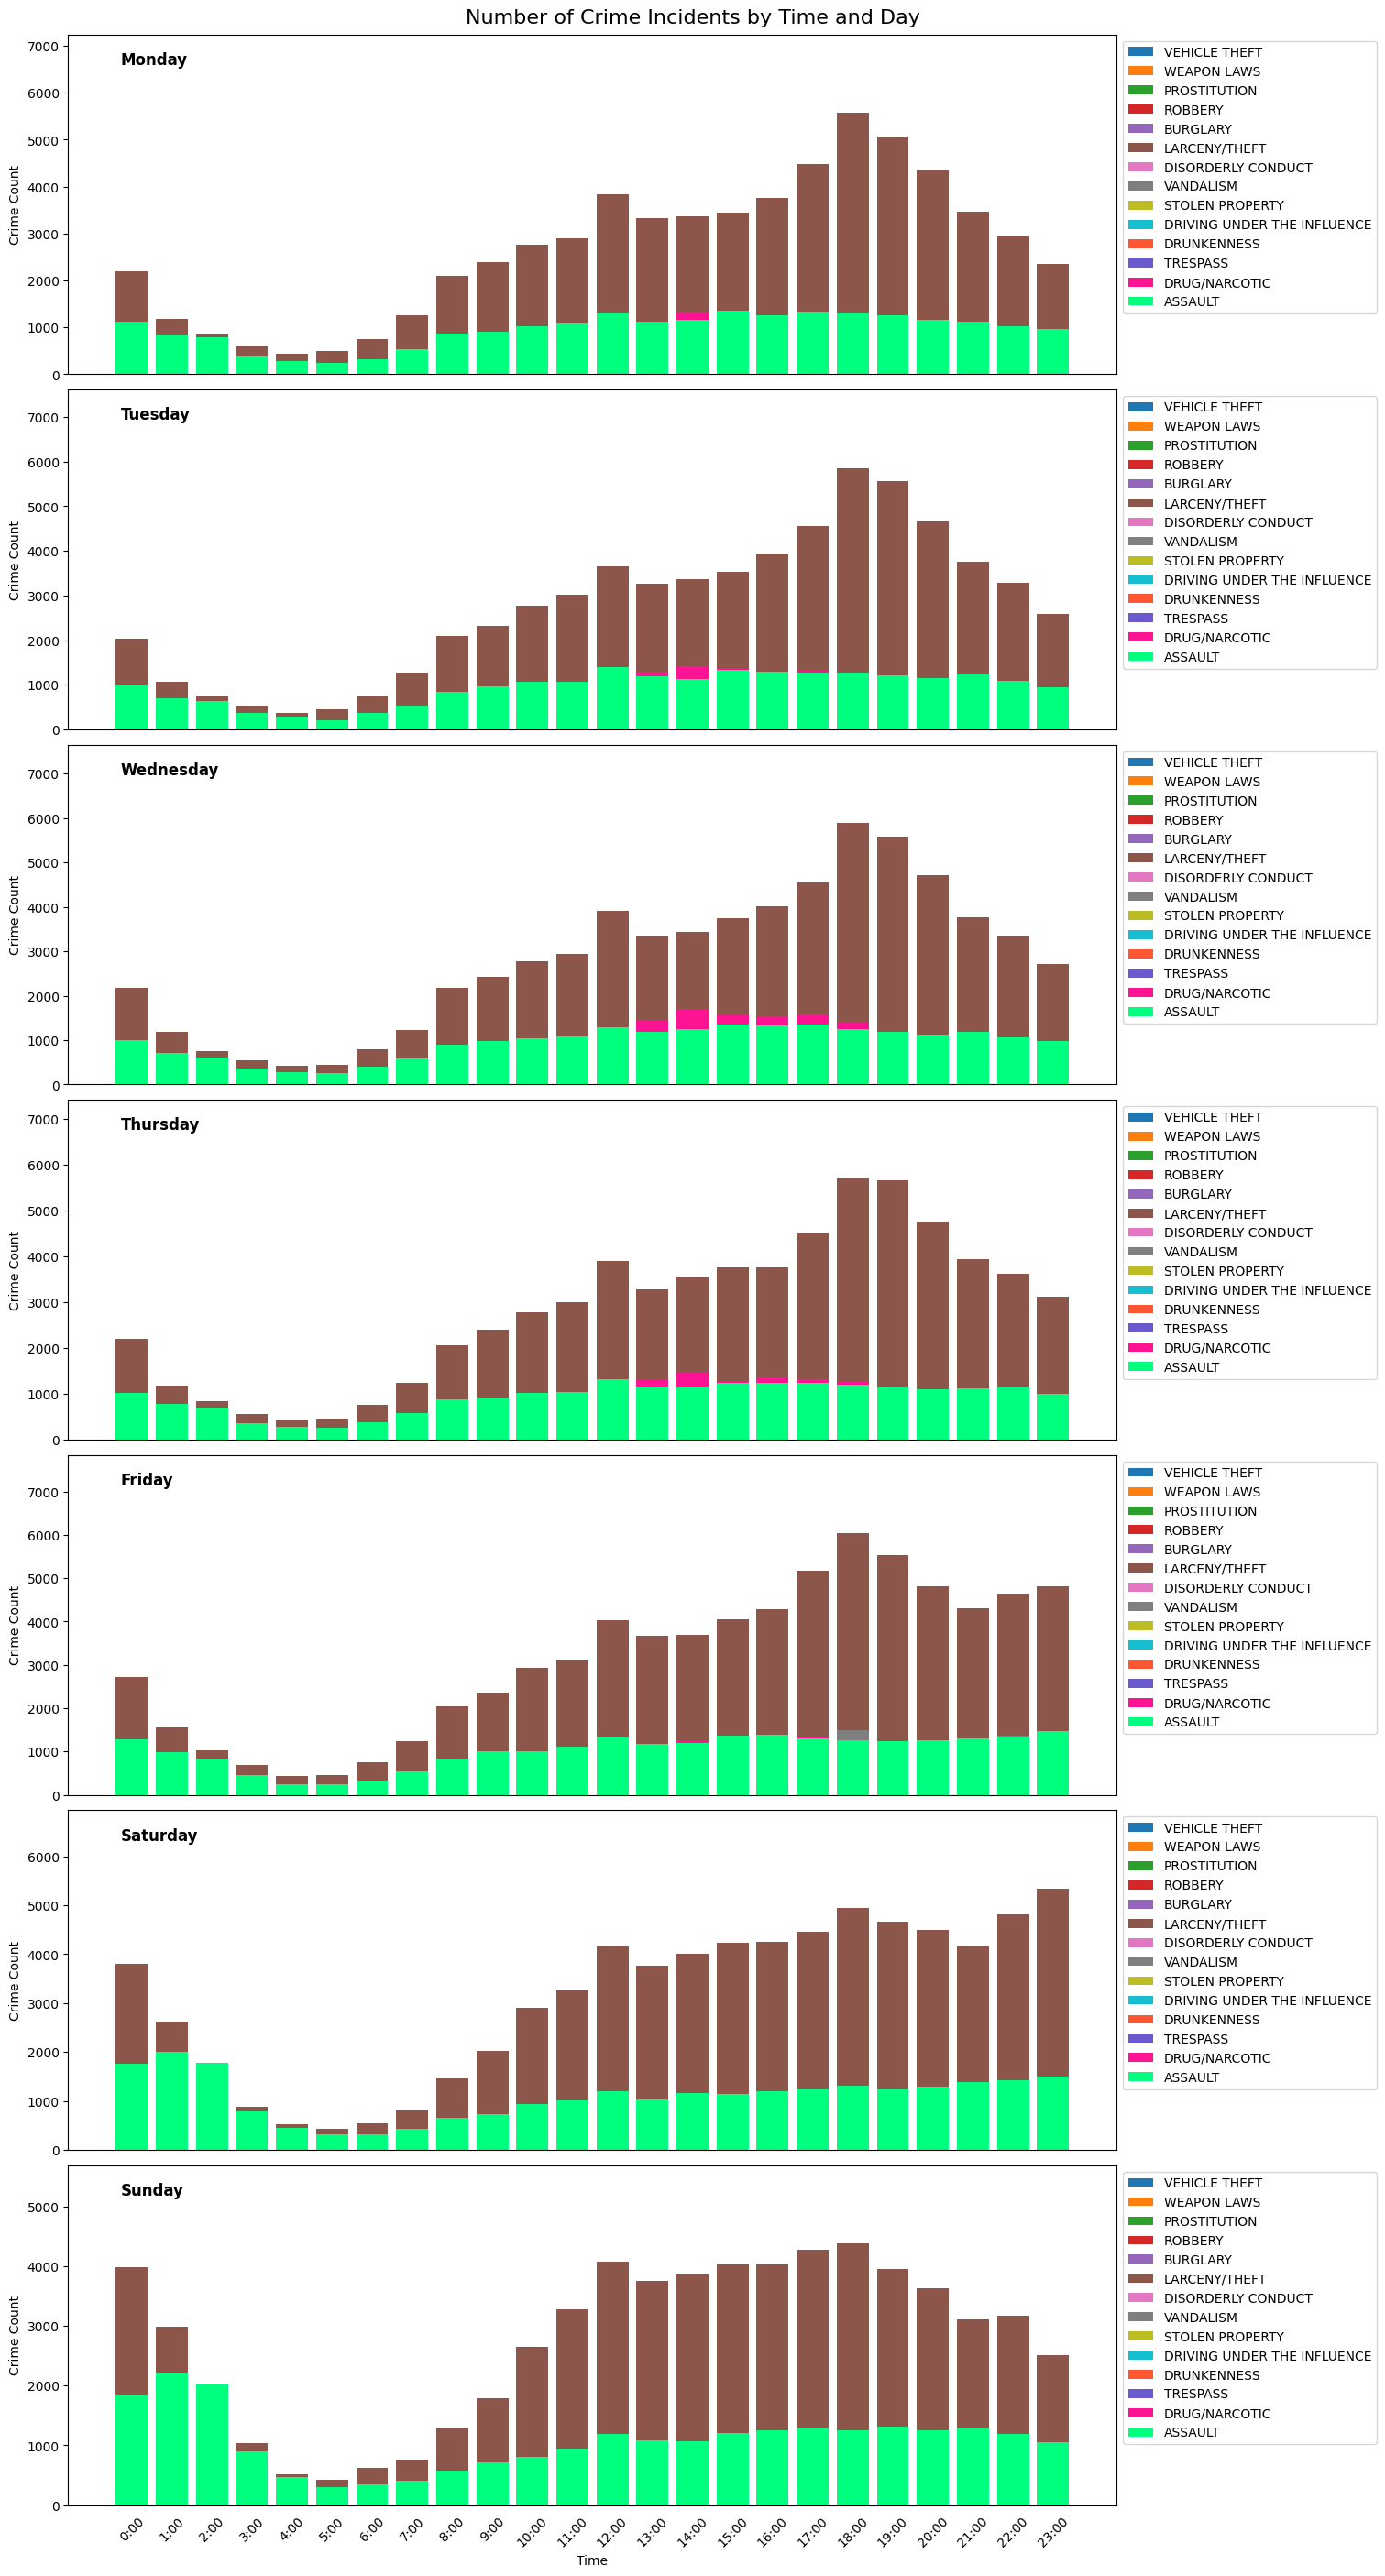

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

color_palette = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
    '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff5733', '#6a5acd',
    '#ff1493', '#00ff7f'
]

crime_occurrences = (data[data['Category'].isin(focuscrimes)].groupby(['Category', 'DayOfWeek', 'Hour']).size().reset_index(name='Count'))
crime_occurrences['DayOfWeek'] = pd.Categorical(crime_occurrences['DayOfWeek'], categories=weekdays, ordered=True)
crime_occurrences.sort_values(by=['DayOfWeek', 'Hour', 'Count'], ascending=[True, True, False], inplace=True)

fig, axs = plt.subplots(7, 1, figsize=(15, 28), constrained_layout=True)
axs = axs.flatten()

for i, day in enumerate(weekdays):
    ax = axs[i]
    max_count = 0 
    for idx, category in enumerate(focuscrimes):
        day_data = crime_occurrences[(crime_occurrences['Category'] == category) & (crime_occurrences['DayOfWeek'] == day)]
        ax.bar(day_data['Hour'], day_data['Count'], label=category, color=color_palette[idx % len(color_palette)])
        max_count = max(max_count, day_data['Count'].max())
    
    ax.set_ylabel('Crime Count')
    ax.set_ylim(0, max_count * 1.3) 
    ax.set_xlabel('Time') if i == 6 else None
    ax.text(0.05, 0.95, day, ha='left', va='top', transform=ax.transAxes, fontsize=12, weight='bold')
    ax.legend(bbox_to_anchor=(1, 1))
    ax.set_xticks(range(24))
    ax.set_xticklabels([f'{hour}:00' for hour in range(24)])
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=(i == 6))
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Number of Crime Incidents by Time and Day', fontsize=16)
plt.show()

#### Comments:

The plots above show the incident numbers of the fourteen crimes by time of day from 0:00 to 23:00 for successively each day of the week in San Francisco from the beginning of 1 January 2003 to the end of 14 May 2018.

### Calendar plot that captures the development of property stealing:

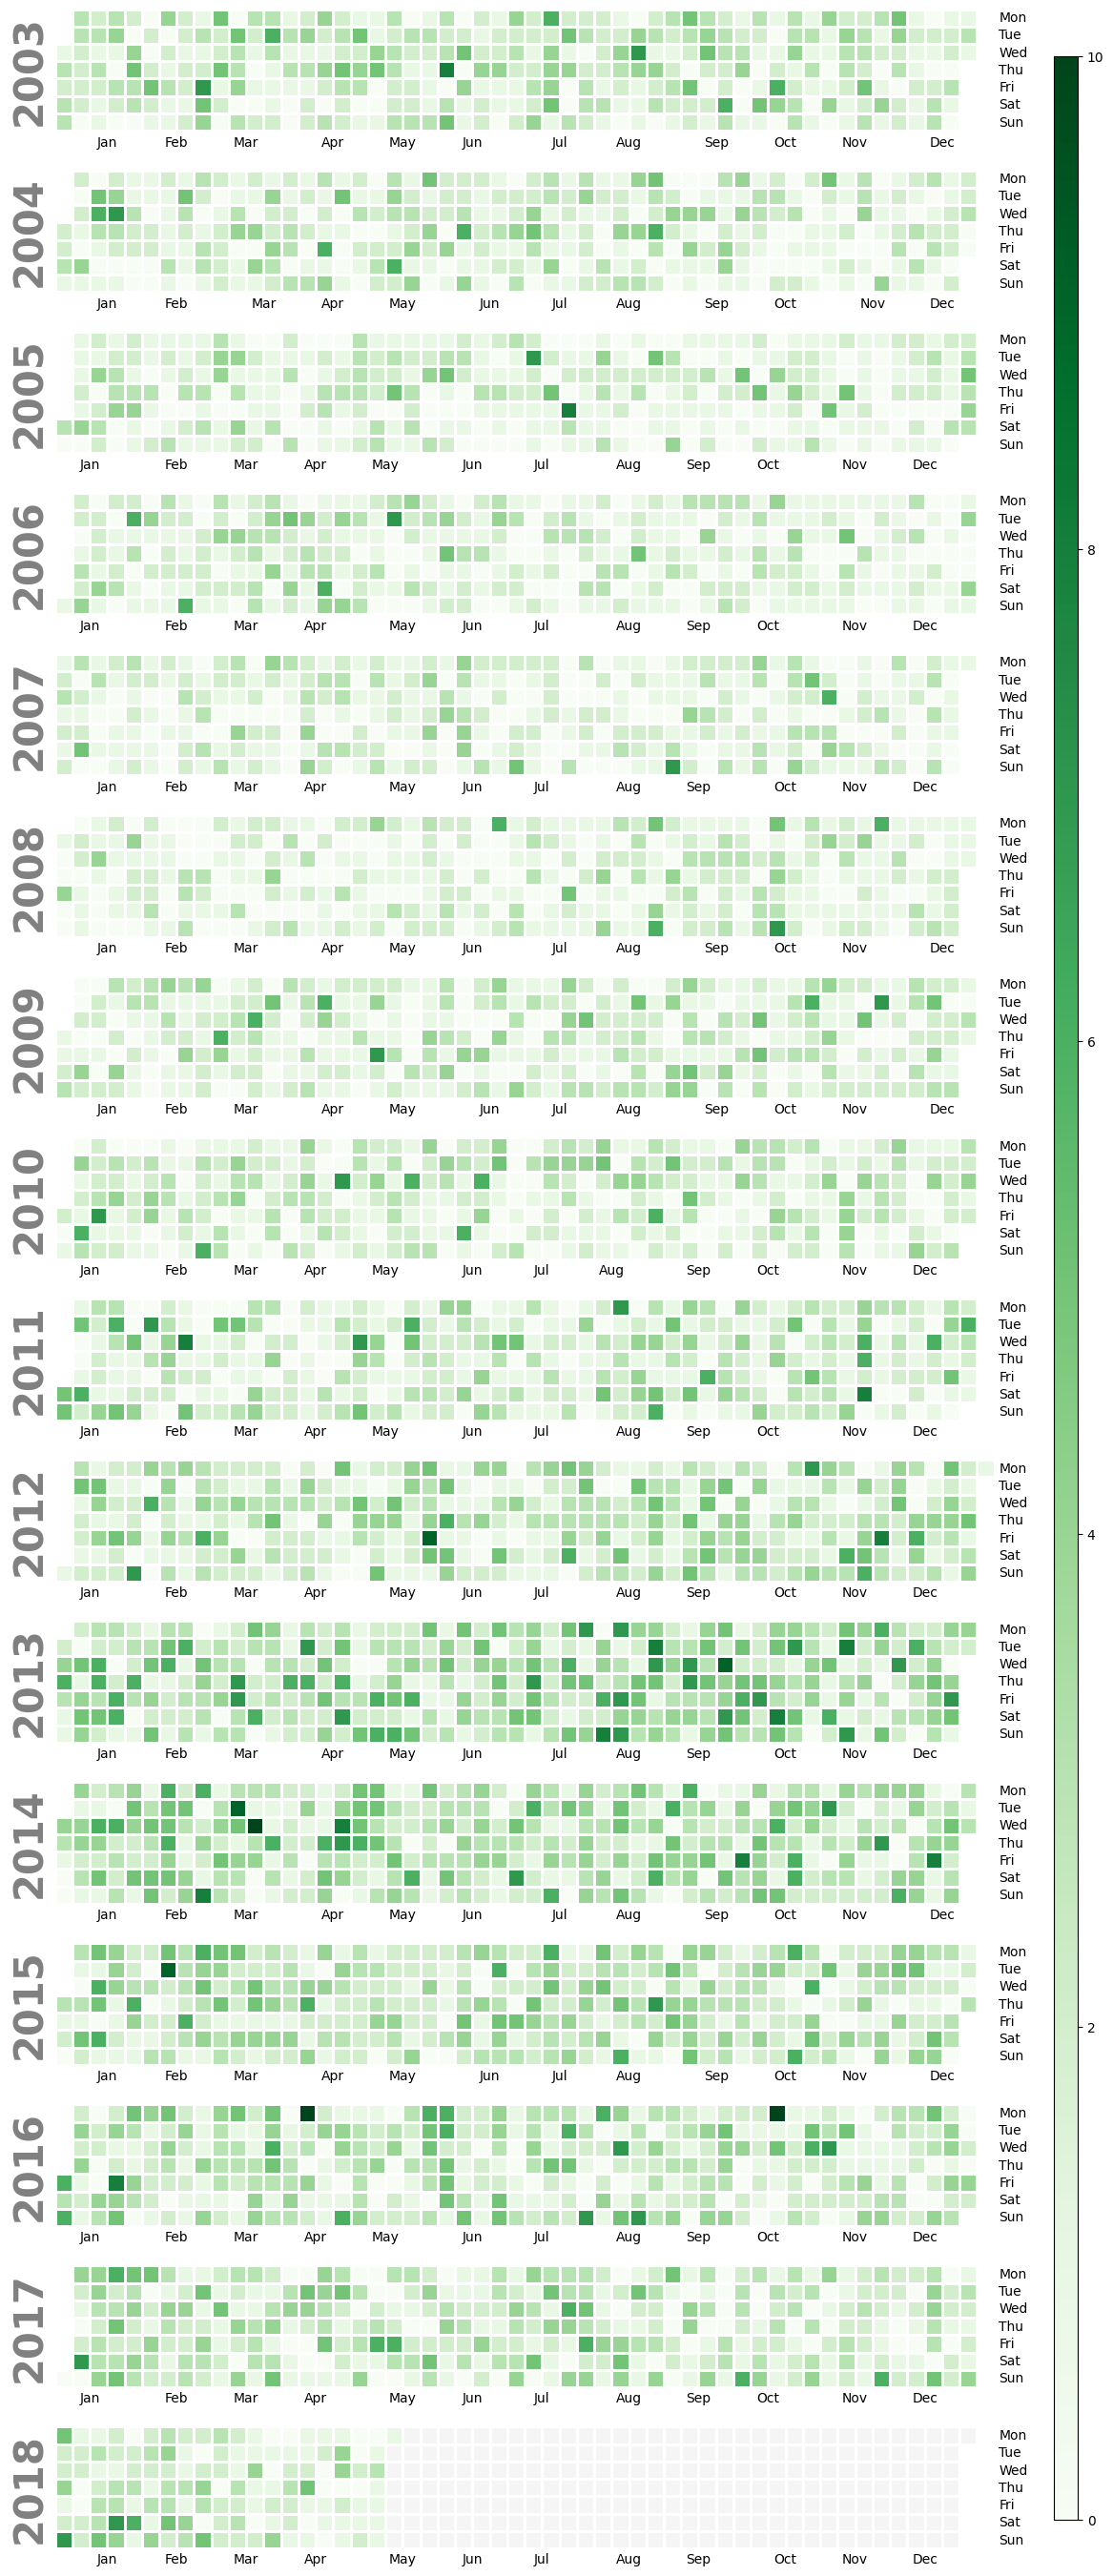

In [8]:
import calplot

cat_data = data[data['Category'] == 'STOLEN PROPERTY'].copy()

cat_data['Date'] = pd.to_datetime(cat_data['Date'])
cat_data['Year'] = cat_data['Date'].dt.year
cat_data['Month'] = cat_data['Date'].dt.month
cat_data['Day'] = cat_data['Date'].dt.day

crime_occurrences = cat_data.groupby(['Year', 'Month', 'Day']).size().reset_index(name='Count')
crime_occurrences['Date'] = pd.to_datetime(crime_occurrences[['Year', 'Month', 'Day']])
crime_occurrences.set_index('Date', inplace=True)

calplot.calplot(crime_occurrences['Count'], cmap='Greens', edgecolor=None, yearlabel_kws={'fontname':'sans-serif'})
plt.show()

#### Comments:

The plot above shows stolen property incident numbers for consecutively each day in San Francisco from the beginning of 1 January 2003 to the end of 14 May 2018.

### Polar plot that captures the development of vandalism:

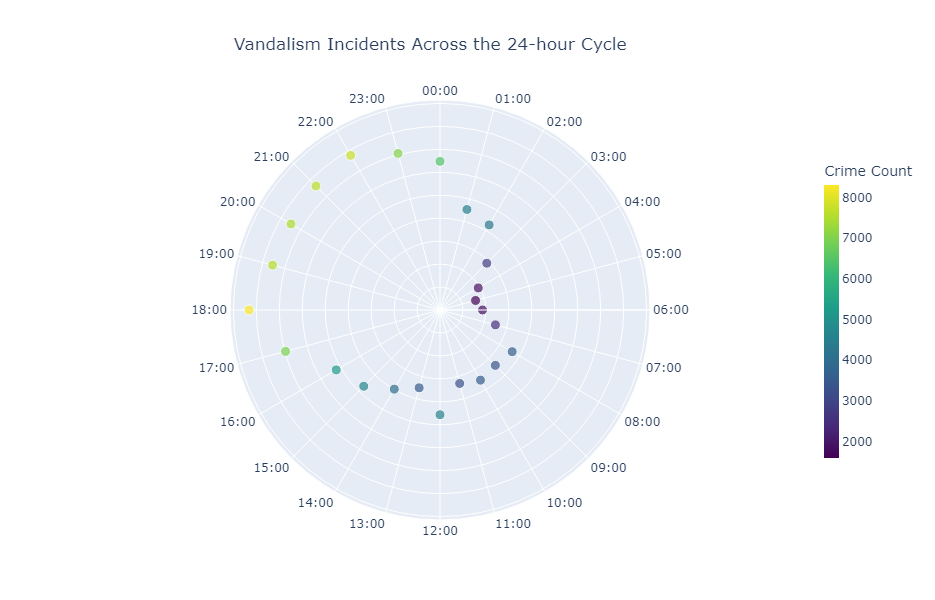

In [9]:
import pandas as pd
import plotly.graph_objects as go

cat_data = data[data['Category'] == 'VANDALISM']
crime_occurrences = cat_data.groupby(['Hour']).size().reset_index(name='Count')

max_count = crime_occurrences['Count'].max()
range_margin = 0.1 * max_count
radial_range = [0, max_count + range_margin]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=crime_occurrences['Count'],
    theta=[f'{hour:02d}:00' for hour in range(24)],
    mode='markers', 
    marker=dict(
        size=10,  
        color=crime_occurrences['Count'],  
        colorscale='Viridis',  
        opacity=0.7,
        line=dict(color='white', width=1), 
        colorbar=dict(
            title='Crime Count',  
            thickness=15,  
            len=0.75,  
        ),
    ),
    hoverinfo='r+theta',
    hovertemplate='%{r} incidences at %{theta}<extra></extra>',
    hoverlabel=dict(bgcolor='white', font_size=12),
))

fig.update_layout(
    title='Vandalism Incidents Across the 24-hour Cycle',
    title_x=0.46,
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=radial_range,
            showticklabels=False
        ),
        angularaxis=dict(direction="clockwise"),
    ),
    height=600,
)

fig.show()

#### Comments:

The plot above shows the number of vandalism incidents by time of day from 0:00 to 23:00 in San Francisco from the beginning of 1 January 2003 to the end of 14 May 2018.

### Use of the LLM:

We used LLM to solve these assignments as it is a great learning tool if you use it as a replacement for TA. We used the LLM if we were strugguling with a bug or error for a long time and could not identify it. At the time, LLM saved us a lot of time. We came up with the code outline and its form on our own. However, we asked the LLM to suggest improvements, optimisations or to shorten parts of the code while keeping the initial sense. We also asked LLM about the existence of functions or libraries that solve a particular problem, e.g. the creation of a polar plot, and what customisation methods are provided by the library creators. LLM was also helpful in explaining the meaning of given methods in Python in a very simple and illustrative way.

## Part 2: Dataviz questions

### What is the difference between data and metadata? How does that relate to the GPS tracks-example?

Metadata is data that serves or supports our perception and definition of relevant and considered data. Metadata does its part in putting the observed into context. Data is the information we observe and analyze. In the context of GPS tracking, coordinates, timestamps, speed and direction of a route can be considered data. Metadata, on the other hand, refers to road conditions, weather conditions or the start and end point of a route.

### The human eye is a great tool for data analysis. Do you agree? Explain why/why not:

Yes, as it allows for visual inspection of patterns in data but should be complemented with quantitative methods to ensure reliability and accuracy, while mitigating subjective biases and potential misguidance and misconceptions. It may not alone provide a comprehensive understanding of complex datasets, but by providing more objective measures, the accuracy and reliability can be ensured. However, the eye’s effectiveness can be limited due to subjective biases, why we need more than one tool to determine data. 
- The human eye is very good at detecting facial expression allowing us to understand emotions and intentions with significant accuracy. This capability helps to navigate social interactions effectively by recognizing signals such as smiles, raised eyebrows, or side eye. This intuitive ability is essential for building emotions or interpret a dataset by understanding its patterns.
- It can be challenging for the human eye to determine subtle color gradients due to limitation of color perception and sensitivity. Gradual transitions between different shades or hues can be difficult in determining and can be affected by surrounding colors and lightning conditions. The eye can adjust to specific color ranges, which can make it harder to distinguish subtle variations. Determining subtle color gradients requires a thorough observation to fully perceiving and interpreting the differences in color. 

### Simpson's paradox is hard to explain. Come up with your own example - or find one on line:

In a study of court sentencing, the observation was that men were more likely to receive harsher sentences compared to women for the same crime. It was found that 77% of men were sentenced, while only 57% of women were sentenced convicted of the same crime. However, it was revealed that men were often involved in more serious offenses with mandatory minimum sentences, where women were more involved in less severe offenses, resulting in a lower proportion of sentencing. Accounting for all relevant factors in the data analysis, the current gender bias in sentencing disappeared. 

### Explain the difference between exploratory and explanatory data analysis:

Exploratory data analysis is about discovering patterns and trends in data to explore the main aspects without explaining it. For example, when analyzing a specific crime type over time, you may observe that this crime is more frequent during warmer months and has a higher concentration in urban areas compared to rural areas. On the other hand, explanatory data analysis aims to understand why these patterns exist and find explanations by making predictions about future events. It focuses on uncovering the underlying reasons behind the observed patterns and helps to understand the “why” behind the discovered patterns.

## Part 3: Visualizing geodata using Plotly

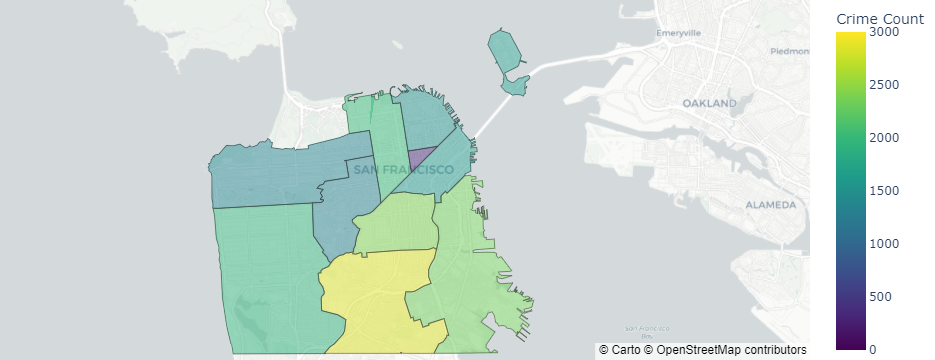

In [10]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    sfpd = json.load(response)

vehicle_theft = data[(data['Category'] == 'VEHICLE THEFT') & (data['DayOfWeek'] == 'Sunday')]
vehicle_theft = vehicle_theft.groupby('PdDistrict').size().reset_index(name='Count')

import plotly.express as px

fig = px.choropleth_mapbox(vehicle_theft, geojson=sfpd, locations='PdDistrict', color='Count',
                           color_continuous_scale="Viridis",
                           range_color=(0, 3000),
                           mapbox_style="carto-positron",
                           zoom=10.5, center = {"lat": 37.7749, "lon": -122.4194},
                           opacity=0.5,
                           labels={'Count':'Crime Count'}
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?

- The safest neighbourhood to park your car in San Fransisco on Sunday: **Tenderloin**
- Least safe neighbourhood to park your can in San Fransisco on Sunday: **Ingleside**

### Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. perceptual errors):

- Changing the range of data-values shows that the results are quite different at first glance. For example, if we set the range from 0 to 2000, then half of the districts are considered unsafe at a similar level. However, if we set the range from 0 to 3000, we can immediately see one district in particular, which has the highest number of vehicle thefts.
- Perceptual errors are a problem because they can be used to manipulate information. For example, as in the example above, at a given scale a district may turn out to be unremarkable compared to others, but at another scale it becomes the target of some problem. Perceptual errors can also be the cause of errors in various types of design projects, where different values do not translate into real conditions and some components of the design cannot be realized.

## Part 4: Errors in the data

### In each of the 3 examples we listed during Week 4, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data:

When data are grouped into bins each bin will represent a range of values, but errors in the data can make these bins unreliable. The aggregation may obscure the underlying distribution of the data, which will lead to misconceptions about its patterns and will not reflect the truth. Furthermore, errors can skew the counts within each bin, where certain bins can be over- or underrepresented. This can cause misleading averages that obscure outliers and provide a distorted view of the average values within each bin. These inaccuracies can lead to misguided interpretations of the dataset. 

### Briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling):

Failing to notice errors in the dataset can lead to misconceptions of the crime patterns. For instance, if inaccuracies in geolocation or time occur will affect our modeling and distort the distribution of crimes across San Francisco. This will lead to incorrect assumptions on particular neighborhoods, hotspots, and trends, which potentially misguide the resources that could be allocated for future crime prevention. Therefore, it is important to ensure accurate reporting for further mapping and analyzing the data of crime s in San Francisco.

### Find your own example of human noise in the data and visualize it:

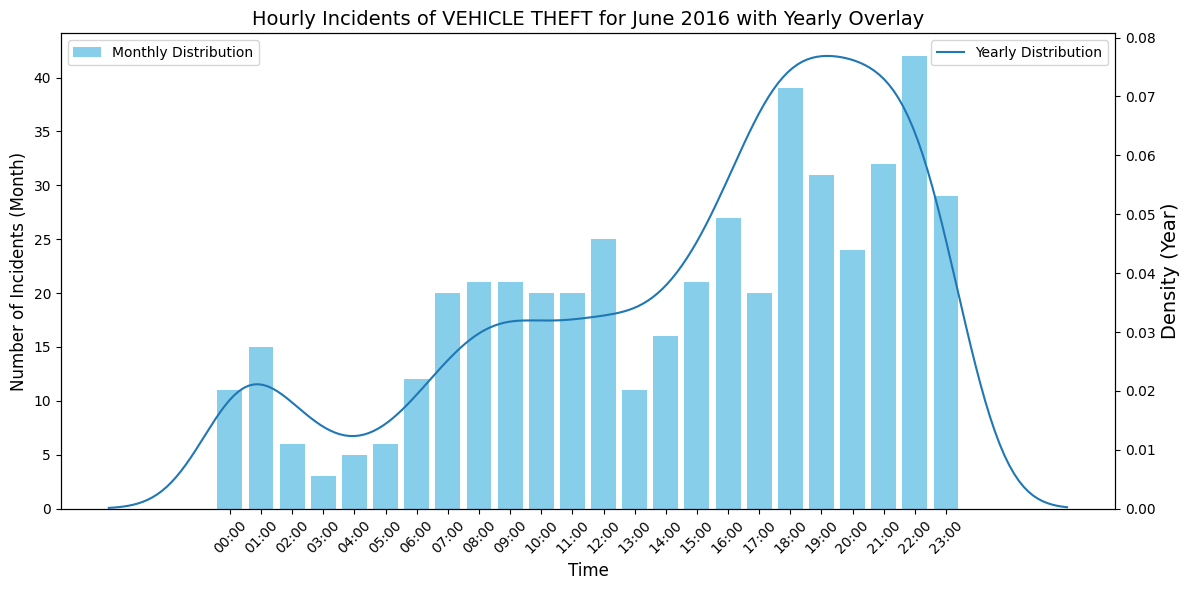

In [14]:
import seaborn as sns

data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M')

focuscrime = ['VEHICLE THEFT']

noisydata = data[data['Category'].isin(focuscrime)]
noisydatayear = noisydata[noisydata['Date'].dt.year == 2016]
noisydatamonth = noisydatayear[noisydatayear['Date'].dt.month == 6]

count_year = noisydatayear.groupby(noisydatayear['Time'].dt.hour).size()
count_month = noisydatamonth.groupby(noisydatamonth['Time'].dt.hour).size()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(count_month.index, count_month.values, color='skyblue', label='Monthly Distribution')
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Number of Incidents (Month)', fontsize=12)
ax1.set_xticks(range(24))
ax1.set_xticklabels([f"{hour:02d}:00" for hour in range(24)], rotation=45)

ax2 = ax1.twinx() 
sns.kdeplot(noisydatayear['Time'].dt.hour, bw_method=0.2, fill=False, label='Yearly Distribution', ax=ax2)
ax2.set_ylabel('Density (Year)', fontsize=14)

plt.title('Hourly Incidents of VEHICLE THEFT for June 2016 with Yearly Overlay', fontsize=14)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

Within the category of 'VEHICLE THEFT', there can exist human noise factors that introduce uncertainty into the reported times of incidents. This uncertainty stems from the possibility that the reported time may not accurately reflect the actual time of the theft. Consequently, it becomes challenging to definitively determine the time of day when this type of crime occurs most frequently. Moreover, it's important to consider that the individual reporting the crime may have discovered the vehicle at a different time, and many cases may end with a resolution status of 'NONE', which can distort the information about the actual timing of the theft. These factors have the potential to skew the pattern of incident counts based on the reported time of occurrence, as they introduce variables that may not directly align with the actual timing of the theft. Therefore, when analyzing data related to 'VEHICLE THEFT', it's essential to consider these human noise factors to avoid misconception of the true patterns underlying the occurrences of this crime.

### Did you find LLMs useful for anything in this exercise? Explain why/why not:

LLMs has been valuable in the creation of visually appealing plots by assisting in code editing. It resulted in less hour of work and more aesthetic and pleasing visualizations. particularly in identifying and addressing human noise factors, leading to enhanced clarity, and understanding of potential errors associated with inaccurate data. It has proven to be a significantly efficient tutor and enhanced the effectiveness of the assignment. In addition, LLMs ability to provide insightful feedback has contributed to a more thorough analysis and interpretation of the data, which has led to greater precision.

## Contributions